In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('TVC_DXY, 1M (1).csv')
df['time'] = df['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
df['MoM_pct_change_close']= df['close'].pct_change(fill_method ='ffill')*100
df['monthly_rate_diff'] = df["USINTR, FEDERAL RESERVE: Open"].diff(periods = 1)

df.drop(columns = ['Basis' ,'Upper','Lower','EMA','USINTR, FEDERAL RESERVE: Open','USINTR, FEDERAL RESERVE: High','USINTR, FEDERAL RESERVE: Low','Smoothing Line','MA','Smoothing Line','Plot','Plot','MA','Smoothing Line','Volume','Volume MA', 'Smoothing Line.1', 'Plot.1','MA.1','Smoothing Line.2'], inplace=True)
# filter the time
filt = (df['time'] > '1975')

df[filt]

,time,open,high,low,close,"USINTR, FEDERAL RESERVE: Close",MoM_pct_change_close,monthly_rate_diff
96,1975-01-01,97.710,97.710,94.430,95.610,7.00,-1.726796,-1.25
97,1975-02-02,95.880,96.410,92.930,93.000,6.00,-2.729840,-1.00
98,1975-03-02,92.820,94.870,92.820,94.820,5.50,1.956989,-1.00
99,1975-03-31,94.450,95.900,94.450,95.390,5.25,0.601139,-0.50
100,1975-04-30,95.360,95.440,94.240,94.630,5.25,-0.796729,-0.25
...,...,...,...,...,...,...,...,...
664,2022-05-01,103.212,105.005,101.297,101.782,1.00,-1.385498,0.50
665,2022-05-31,101.761,105.788,101.644,104.738,1.75,2.904246,0.75
666,2022-06-30,104.775,109.294,104.742,105.828,2.50,1.040692,0.75
667,2022-07-31,105.828,109.478,104.636,108.685,NaN,2.699664,NaN


Text(0, 0.5, 'USINTR, FEDERAL RESERVE: Close')

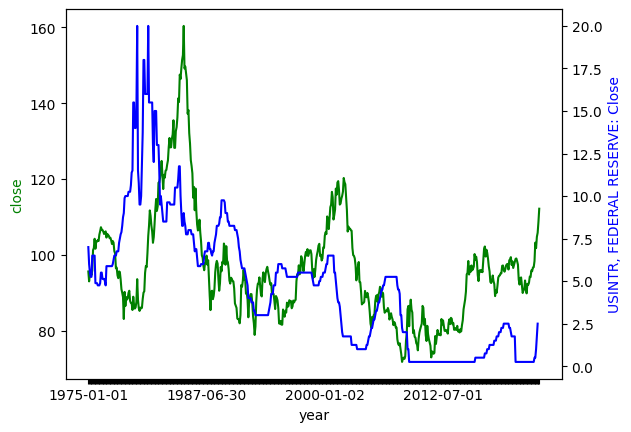

In [3]:
# set timeframe as you whish
filt = (df['time'] > '1975')
df_tf = df[filt] 

x = df_tf['time']
y1 = df_tf['close']
y2 = df_tf['USINTR, FEDERAL RESERVE: Close']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

# timestamps were too close, slicker solution surely exsist, probably with locator params
every_nth = 150
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

ax1.set_xlabel('year')
ax1.set_ylabel('close', color='g')
ax2.set_ylabel('USINTR, FEDERAL RESERVE: Close', color='b')

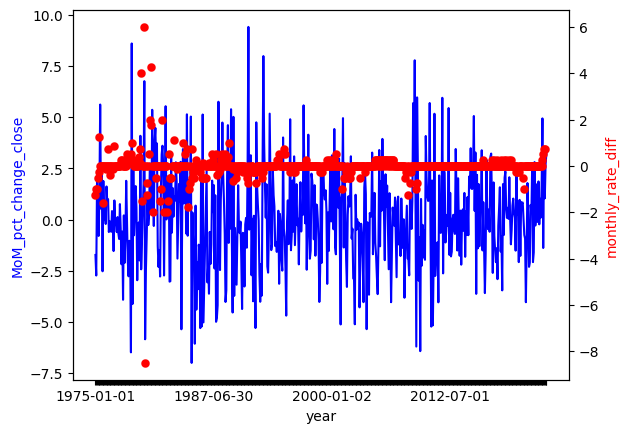

In [4]:
# set timeframe as you whish 
filt = (df['time'] > '1975')
df_tf = df[filt] 

x = df_tf['time']
y1 = df_tf['MoM_pct_change_close']
y2 = df_tf['monthly_rate_diff']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'b-')
ax2.scatter(x, y2, marker='o', linewidths= 0.1, c= 'red')

# timestamps were too close, slicker solution surely exsist, probably with locator params
every_nth = 150
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

ax1.set_xlabel('year')
ax1.set_ylabel('MoM_pct_change_close', color='b')
ax2.set_ylabel('monthly_rate_diff', color='r')

#observe % price changes plotet along monthly rate changes
plt.show()

In [5]:
#observe correlation 
filt = (df['time'] > '1975')
df_tf = df[filt] 

df_tf['close'].corr(df['USINTR, FEDERAL RESERVE: Close'], method='pearson', min_periods=1)

0.4043734805464292

In [7]:
# we are interested in positive correlation in rising rates environments
filt = (df['time'] > '1975')
df_tf = df[filt] 

filt2 = (df['USINTR, FEDERAL RESERVE: Close'] >= 1) & (df['monthly_rate_diff'] > 0)
df_tf[filt2]

/var/folders/nf/256s4k8131j6prvssbwmwtm00000gn/T/ipykernel_21439/3927801379.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tf[filt2]


,time,open,high,low,close,"USINTR, FEDERAL RESERVE: Close",MoM_pct_change_close,monthly_rate_diff
101,1975-06-01,94.530,95.860,94.360,95.860,6.50,1.299799,1.25
112,1976-05-02,106.290,107.290,105.610,107.290,5.50,0.997835,0.75
119,1976-12-01,106.230,106.230,104.520,104.560,5.88,-1.534984,0.88
128,1977-08-31,103.690,103.990,103.210,103.210,6.25,-0.414898,0.12
129,1977-10-02,102.690,102.910,100.960,100.960,6.50,-2.180021,0.25
...,...,...,...,...,...,...,...,...
620,2018-09-02,95.187,95.737,93.814,95.134,2.25,0.036804,0.25
623,2018-12-02,97.133,97.711,95.995,96.024,2.50,-1.206827,0.25
664,2022-05-01,103.212,105.005,101.297,101.782,1.00,-1.385498,0.50
665,2022-05-31,101.761,105.788,101.644,104.738,1.75,2.904246,0.75


In [6]:
filt = (df['time'] > '1975')
df_tf = df[filt]

filt2 = (df['USINTR, FEDERAL RESERVE: Close'] >= 1) & (df['monthly_rate_diff'] > 0)
df_tf[filt2]

df_tf_high_rates_with_hiking = df_tf[filt2]

#calculate correlation in risig rates environemnts
df_tf_high_rates_with_hiking['close'].corr(df['USINTR, FEDERAL RESERVE: Close'], method='pearson', min_periods=1)

-0.5876407519373684